In [1]:
#Installing Pytesseract for Google Colab
!pip install pytesseract
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
#Checking where is the tesseract execution file is located
#Setting up the environment. Importing completed!!
!which tesseract/usr/bin/tesseract

In [3]:
import re
import cv2 
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

**Preprocessing of images using OpenCV:**

We will write basic functions for different preprocessing methods

*   Grayscaling
*   Thresholding
*   Dilating
*   Eroding
*   Opening
*   Canny edge detection
*   Noise removal
*   Deskewing
*   Template matching


In [4]:
#Preprocessing the image:
#Grayscaling
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#Thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#Dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#Erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#Opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#Canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#Skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#Template Matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

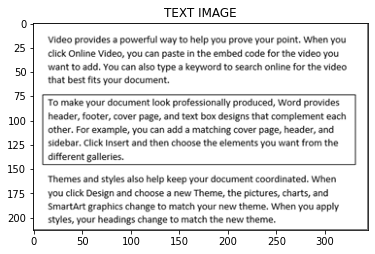

In [5]:
# Plotting the original image

image = cv2.imread('/content/drive/My Drive/Colab Notebooks/images/s.jpg')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('TEXT IMAGE')
plt.show()

In [6]:
# Preprocessing the image 

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
images = {'gray': gray, 'thresh': thresh, 'opening': opening, 'canny': canny}

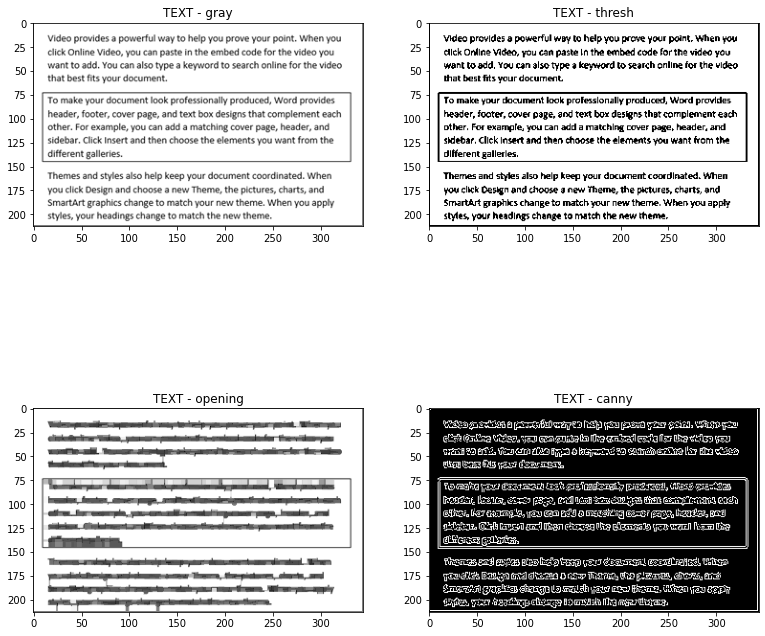

In [7]:
# Plotting images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('TEXT - ' + keys[i]) 
    plt.imshow(images[keys[i]], cmap='gray')    

In [8]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'

print(pytesseract.image_to_string(image, config=custom_config))

‘video provides a powerful way to help you prove your point. When you
Click Online video, you can paste inthe embed code forthe video you
want to add, You cn aso type a keyword to search online fr the video
that bes fits your document.

To make your document look professionally produced, Word provides
header, footer, cover page, and text box designs that complement each
other. For example, you can add a matching cover page, header, and
sidebar. Click inset and then choose the elements you want fom the
trent galeries.

“Themes and styles also help keep your document coordinated. When
you dick Design and choose anew Theme, the pictures, chats, and
SmartArt graphics change to match your new theme When you apply
styles, your headings change to match the new theme.


### **Bounding box information using Pytesseract:**


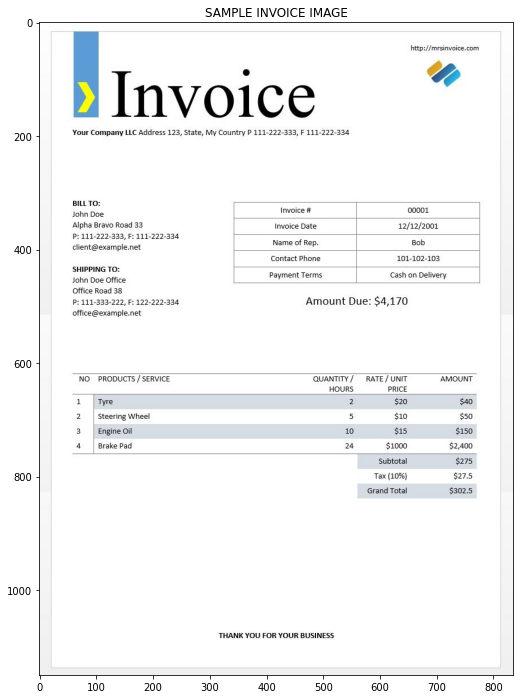

In [9]:
# Plotting original image

image = cv2.imread('/content/drive/My Drive/Colab Notebooks/images/invoice-sample.jpg')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE IMAGE')
plt.show()

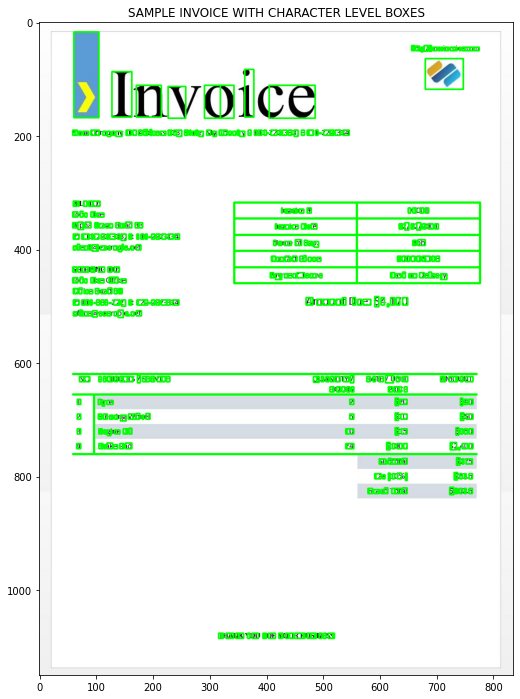

In [10]:
# Plotting character boxes on image using pytesseract.image_to_boxes() function

image = cv2.imread('/content/drive/My Drive/Colab Notebooks/images/invoice-sample.jpg')
h, w, c = image.shape
boxes = pytesseract.image_to_boxes(image) 
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE WITH CHARACTER LEVEL BOXES')
plt.show()

DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


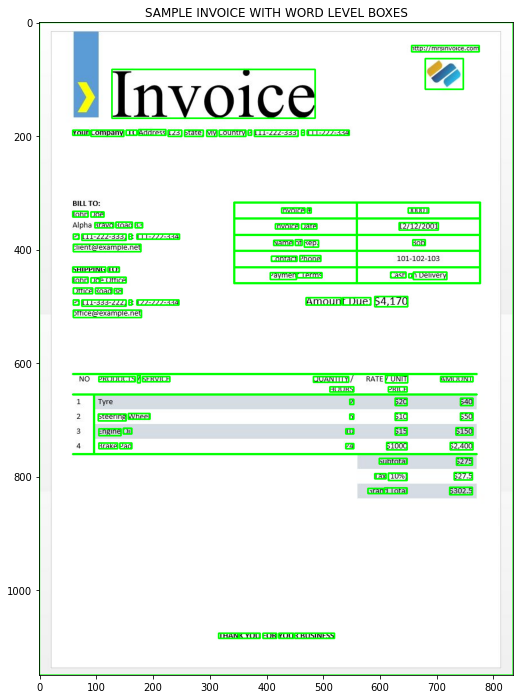

In [11]:
# Plotting word boxes on image using pytesseract.image_to_data() function

image = cv2.imread('/content/drive/My Drive/Colab Notebooks/images/invoice-sample.jpg')
d = pytesseract.image_to_data(image, output_type=Output.DICT)
print('DATA KEYS: \n', d.keys())

n_boxes = len(d['text'])
for i in range(n_boxes):
    # The condition to only pick boxes with a confidence > 60%
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE WITH WORD LEVEL BOXES')
plt.show()

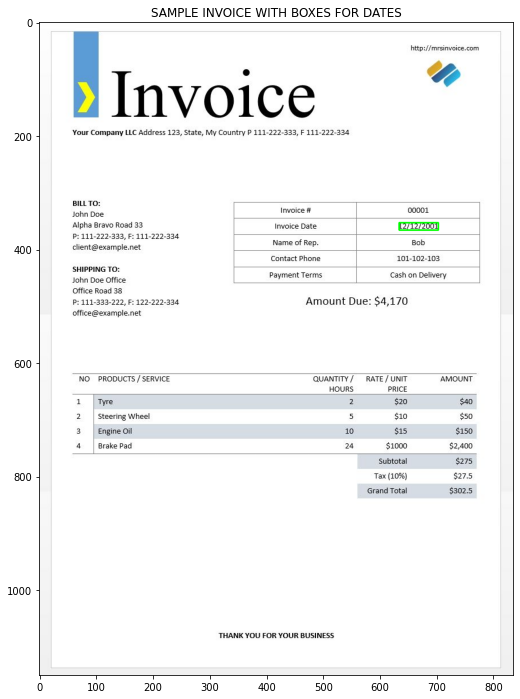

In [12]:
# Plotting boxes around text that matches a certain regex template
# In this we will extract only the date from the sample invoice

image = cv2.imread('/content/drive/My Drive/Colab Notebooks/images/invoice-sample.jpg')
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        if re.match(date_pattern, d['text'][i]):
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE WITH BOXES FOR DATES')
plt.show()

### **An Extension to the project:**
By making minor changes in the config file we can 
- Specify language
- Detect only digits
- Whitelist characters
- Blacklist characters
- Work with multiple languages

Some of the above mentioned techniques are shown below:

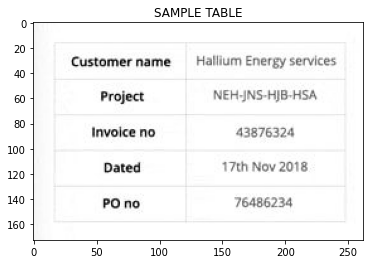

In [13]:
# Plotting the original image
image = cv2.imread('/content/drive/My Drive/Colab Notebooks/images/digits-task.jpg')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('SAMPLE TABLE')
plt.show()

In [14]:
# Original tesseract output with english language sepcified

custom_config = r'-l eng --oem 3 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

‘Customer name Halim Energy services
Project NEHINS-HIB-HSA
lavoice no 43876324
Dated 17th Nov2018.
POno 176496234


In [15]:
# Output with outputbase digits

custom_config = r'--oem 3 --psm 6 outputbase digits'
print(pytesseract.image_to_string(image, config=custom_config))

‘Customer name Halim Energy services
Project NEHINS-HIB-HSA
lavoice no 43876324
Dated 17th Nov2018.
POno 176496234


In [16]:
# Output with a whitelist of characters (here, we have used all the lowercase characters from a to z only)

custom_config = r'-c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyz --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

‘Customer name Halim Energy services
Project NEHINS-HIB-HSA
lavoice no 43876324
Dated 17th Nov2018.
POno 176496234


In [17]:
# Output without the blacklisted characters (here, we have removed all digits)

custom_config = r'-c tessedit_char_blacklist=0123456789 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

‘Customer name Halim Energy services
Project NEHINS-HIB-HSA
lavoice no 43876324
Dated 17th Nov2018.
POno 176496234


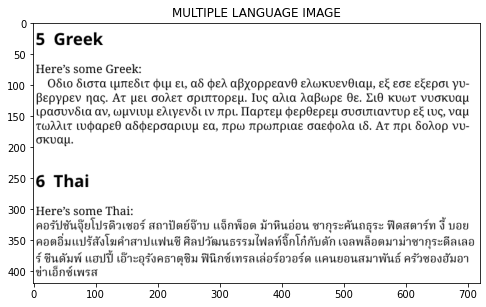

In [18]:
# working with multiple languages

# Plotting the original image

image = cv2.imread('/content/drive/My Drive/Colab Notebooks/images/greek-thai.png')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(8,16))
plt.imshow(rgb_img, cmap = 'gray')
plt.title('MULTIPLE LANGUAGE IMAGE')
plt.show()

In [19]:
# Output with only english language specified

custom_config = r'-l eng --oem 3 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

5 Greek
Here’s some Greek:

OSto Stota tuMedit Huy et, aS ea aByoppeave edAwkvevOuay, e§ ece efepot yu-
Bepypev nas. AT Wel GoAET apiTtopen. Tug aAta AaBwpe Ve. LO KUWT VUoKLaL
(paovvéia av, WUVLUU eAtyevil tv mpL TMaptep bepSepey GvaTLAaVTUp e€€ LUG, Va
TWAALT LUdaped ASdepoapluy Ea, TOW TpwTplae Gaedoda 16. AT mpt SoAop vv-
oxvau.

6 Thai

Here’s some Thai: .
aosUsugulushawos amiaddw usntioa sinfudou winszduagss Haaonsn 3 vos
Aonduusaladrawunud AavTausssulwavianlAdudn wandoamnsiwinsedataa
$ Guduvi woud rvaseasiadu Windinsadosor0sa uausouanrwus aswouduer
didadinsa


In [20]:
# Output with all languages specified

custom_config = r'-l grc+tha+eng --oem 3 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

5 Greek
Here’s some Greek:

OSto Stota tuMedit Huy et, aS ea aByoppeave edAwkvevOuay, e§ ece efepot yu-
Bepypev nas. AT Wel GoAET apiTtopen. Tug aAta AaBwpe Ve. LO KUWT VUoKLaL
(paovvéia av, WUVLUU eAtyevil tv mpL TMaptep bepSepey GvaTLAaVTUp e€€ LUG, Va
TWAALT LUdaped ASdepoapluy Ea, TOW TpwTplae Gaedoda 16. AT mpt SoAop vv-
oxvau.

6 Thai

Here’s some Thai: .
aosUsugulushawos amiaddw usntioa sinfudou winszduagss Haaonsn 3 vos
Aonduusaladrawunud AavTausssulwavianlAdudn wandoamnsiwinsedataa
$ Guduvi woud rvaseasiadu Windinsadosor0sa uausouanrwus aswouduer
didadinsa
